In [55]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings("default", category=DeprecationWarning, module="__main__")
warnings.filterwarnings("default", category=PendingDeprecationWarning, module="__main__")

In [56]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [57]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 
                   'Flavonoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                   '0D280/0D315 of diluted wines', 'Proline']

In [19]:
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [20]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavonoids,Nonflavonoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
df_wine.isnull().any()

Class label                     False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavonoids                      False
Nonflavonoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
0D280/0D315 of diluted wines    False
Proline                         False
dtype: bool

In [51]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class label                     178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavonoids                      178 non-null float64
Nonflavonoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
0D280/0D315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


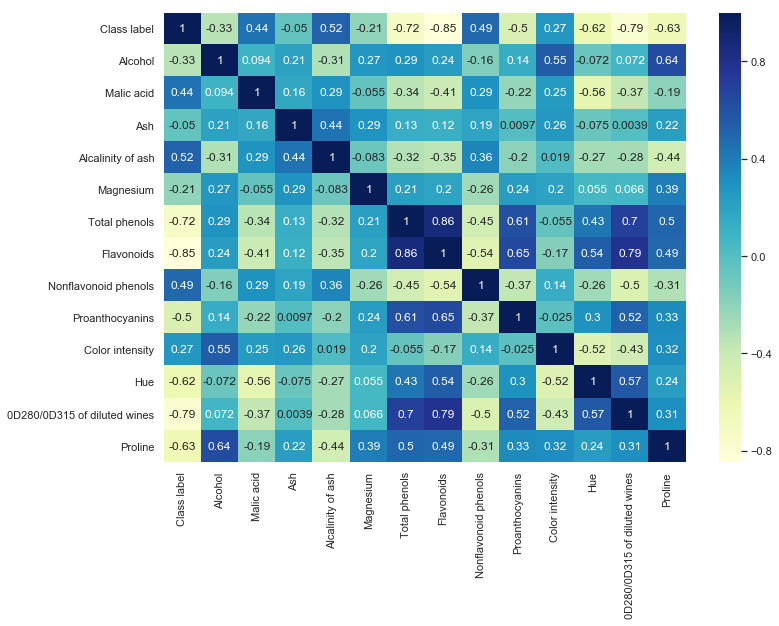

In [22]:
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = df_wine[df_wine.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


In [48]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

array([[ 8.94437367e-01, -3.88117877e-01,  1.10073064e+00,
        -8.12017114e-01,  1.13201117e+00,  1.09807851e+00,
         7.12041017e-01,  1.81013423e-01,  6.62804643e-02,
         5.12859235e-01,  7.96297849e-01,  4.48295020e-01,
         1.90593792e+00],
       [-1.04879931e+00, -7.72993966e-01,  5.41190056e-01,
        -2.40938809e-01,  3.49414498e-01, -7.07219221e-01,
        -3.08121293e-01,  6.76138376e-01, -1.03520519e+00,
        -9.06567274e-01,  2.24570604e+00, -5.61881713e-01,
        -1.22874035e+00],
       [ 1.64744158e+00, -4.13776283e-01,  2.42768413e-01,
        -1.56343594e+00, -2.19746720e-01,  2.84881333e-01,
         4.47191186e-01, -5.61674005e-01,  5.74658458e-01,
         6.79643589e-02,  2.98063782e-01,  1.38631627e+00,
         1.64471473e+00],
       [ 2.02159300e-01, -4.90751501e-01, -9.13615453e-01,
        -2.58536553e+00,  6.48338887e-02,  5.28840485e-01,
         6.82613258e-01, -8.91757306e-01, -6.11556861e-01,
        -3.00662824e-01,  4.33945800e

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

Models appended...


In [34]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model, X_train, y_train.ravel(), cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 95.12820512820512
Naive Bayes: 95.12820512820512
K-Nearest Neighbour: 73.3974358974359
Decision Tree: 86.15384615384617
Support Vector Machine-linear: 95.96153846153847
Support Vector Machine-rbf: 43.65384615384616
Random Forest: 93.58974358974359
eXtreme Gradient Boost: 94.2948717948718
MLP: 37.243589743589745
AdaBoostClassifier: 91.0897435897436
GradientBoostingClassifier: 91.85897435897436


In [35]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model, X_train_std, y_train.ravel(), cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 96.73076923076923
Naive Bayes: 95.12820512820512
K-Nearest Neighbour: 93.52564102564102
Decision Tree: 86.08974358974359
Support Vector Machine-linear: 96.79487179487178
Support Vector Machine-rbf: 98.46153846153847
Random Forest: 94.2948717948718
eXtreme Gradient Boost: 94.2948717948718
MLP: 96.02564102564102
AdaBoostClassifier: 91.02564102564102
GradientBoostingClassifier: 91.85897435897436
